In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


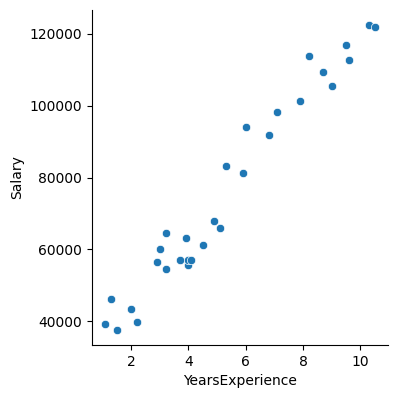

In [ ]:
sns.pairplot(df, x_vars = 'YearsExperience', y_vars = 'Salary', height = 4, aspect = 1, kind = 'scatter')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(21, 1)

In [ ]:
y_train.shape

(21,)

In [ ]:
X_test.shape

(9, 1)

In [ ]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [ ]:
m = lr.coef_
b = lr.intercept_
pred_salary = m*9.6 + b
pred_salary

array([115573.62288352])

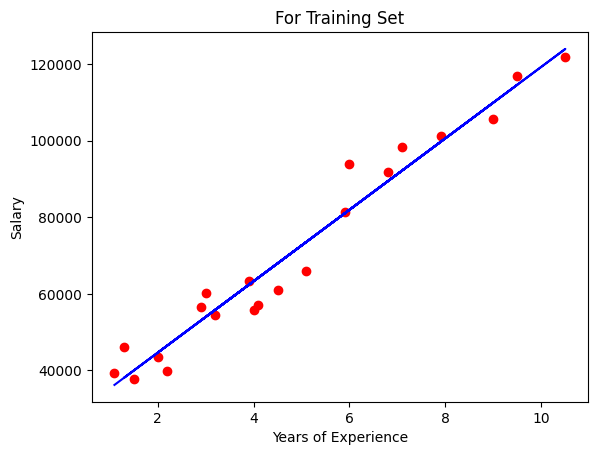

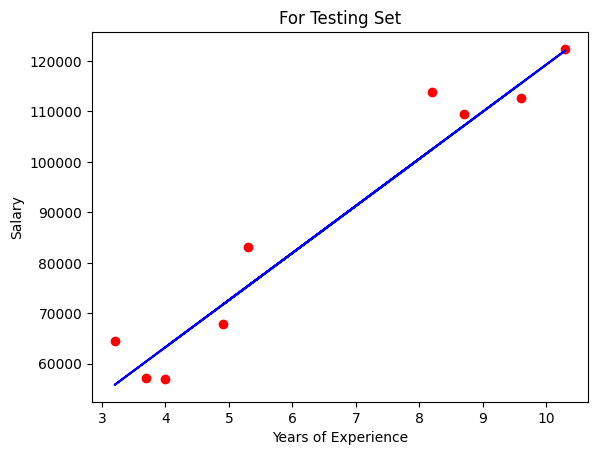

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('For Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr.predict(X_test), color = 'blue')
plt.title('For Testing Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import *

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

37784662.46621314

In [ ]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.9414466227178214

In [ ]:
from scipy import stats

In [ ]:
pred_salary

array([115573.62288352])

In [ ]:
se = np.sqrt(mse)

In [ ]:
confidence_level = 0.95

In [ ]:
margin_of_error = se * stats.t.ppf((1 + confidence_level) / 2, len(X_test) - 2)

In [ ]:
margin_of_error

14535.16321379716

In [ ]:
lower_bound = y_pred - margin_of_error
lower_bound

array([101038.45966972,  57144.77556779,  87963.74525638,  60880.40825732,
        41268.3366373 ,  45937.87749921, 107575.81687639,  92633.28611829,
        48739.60201636])

In [ ]:
upper_bound = y_pred - margin_of_error
upper_bound

array([101038.45966972,  57144.77556779,  87963.74525638,  60880.40825732,
        41268.3366373 ,  45937.87749921, 107575.81687639,  92633.28611829,
        48739.60201636])

In [ ]:
for lower, upper, prediction in zip(lower_bound, upper_bound, y_pred):
    print(f"Prediction: {prediction}, Confidence Interval: [{lower}, {upper}]")

Prediction: 115573.6228835191, Confidence Interval: [101038.45966972194, 101038.45966972194]
Prediction: 71679.93878158767, Confidence Interval: [57144.77556779051, 57144.77556779051]
Prediction: 102498.90847017782, Confidence Interval: [87963.74525638066, 87963.74525638066]
Prediction: 75415.57147111374, Confidence Interval: [60880.40825731658, 60880.40825731658]
Prediction: 55803.499851101835, Confidence Interval: [41268.336637304674, 41268.336637304674]
Prediction: 60473.04071300943, Confidence Interval: [45937.87749921227, 45937.87749921227]
Prediction: 122110.98009018974, Confidence Interval: [107575.81687639258, 107575.81687639258]
Prediction: 107168.44933208541, Confidence Interval: [92633.28611828825, 92633.28611828825]
Prediction: 63274.76523015399, Confidence Interval: [48739.60201635683, 48739.60201635683]
